In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("train.csv")
df.head(10)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
5,5,Audi,A6 2.0T Sport,2018,40950,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes,29950
6,6,Audi,A8 L 3.0T,2016,62200,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes,28500
7,7,Chevrolet,Silverado 1500 1LZ,2016,102604,E85 Flex Fuel,355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,White,Gray,None reported,Yes,12500
8,8,Ford,F-150 XLT,2020,38352,Gasoline,2.7L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Snowflake White Pearl Metallic,Black,None reported,Yes,62890
9,9,BMW,M4 Base,2015,74850,Gasoline,425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Black,Blue,None reported,Yes,4000


In [124]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 188533, Number of columns: 13


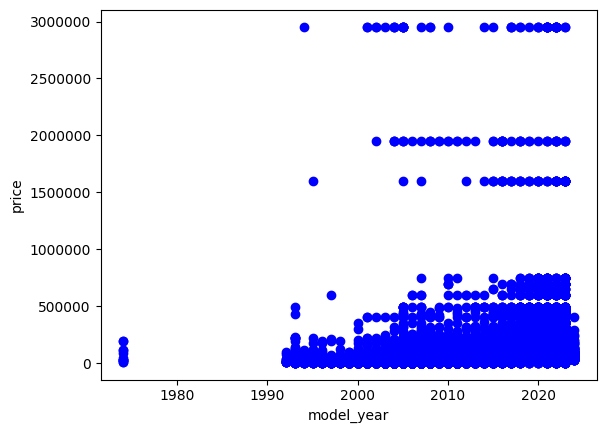

In [125]:
plt.scatter(df.model_year, df.price, color='blue')
plt.xlabel("model_year")
plt.ylabel("price")
plt.ticklabel_format(style='plain', axis='y')  # Ensure no scientific notation
plt.show()

In [126]:
cars_with_accidents = df[df['accident'] != 'None reported']
cars_without_accidents = df[df['accident'] == 'None reported']

average_price_with_accidents = cars_with_accidents['price'].mean()
average_price_without_accidents = cars_without_accidents['price'].mean()


print(f"Average price of cars with reported accidents: {average_price_with_accidents:.2f}")
print(f"Average price of cars without reported accidents: {average_price_without_accidents:.2f}")

Average price of cars with reported accidents: 26981.16
Average price of cars without reported accidents: 49024.80


In [127]:
average_price_by_fuel_type = df.groupby('fuel_type')['price'].mean()


print("Average price by fuel type:")
print(average_price_by_fuel_type)

Average price by fuel type:
fuel_type
Diesel            48769.587358
E85 Flex Fuel     26729.755457
Gasoline          43360.013782
Hybrid            55473.451698
Plug-In Hybrid    44150.967370
not supported     20692.733333
–                 36414.285531
Name: price, dtype: float64


### Preprocess string data 

In [128]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()

columns_to_encode = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

df[columns_to_encode] = ordinal_encoder.fit_transform(df[columns_to_encode])

df.head()


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,31.0,495.0,2007,213000,2.0,116.0,38.0,312.0,71.0,1.0,0.0,4200
1,1,28.0,930.0,2002,143250,2.0,366.0,38.0,263.0,10.0,0.0,0.0,4999
2,2,9.0,1575.0,2002,136731,1.0,640.0,38.0,38.0,71.0,1.0,0.0,13900
3,3,16.0,758.0,2017,19500,2.0,863.0,49.0,29.0,14.0,1.0,0.0,45000
4,4,36.0,1077.0,2021,7388,2.0,259.0,23.0,29.0,10.0,1.0,0.0,97500


### Creating train and test data to evaluate the model

In [151]:
X = df.drop(['clean_title' , 'price', 'id'], axis = 1)
X.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident
0,31.0,495.0,2007,213000,2.0,116.0,38.0,312.0,71.0,1.0
1,28.0,930.0,2002,143250,2.0,366.0,38.0,263.0,10.0,0.0
2,9.0,1575.0,2002,136731,1.0,640.0,38.0,38.0,71.0,1.0
3,16.0,758.0,2017,19500,2.0,863.0,49.0,29.0,14.0,1.0
4,36.0,1077.0,2021,7388,2.0,259.0,23.0,29.0,10.0,1.0


In [152]:
y = df['price']
y.head()

0     4200
1     4999
2    13900
3    45000
4    97500
Name: price, dtype: int64

In [153]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Scale features

In [154]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Define the model

In [155]:
model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1)  # Linear activation
])

### Compile the model

In [156]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0),
              loss='mse',
              metrics=['mae'])


### Train the model

In [157]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4714/4714 [==============================] - 4s 690us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
4714/4714 [==============================] - 3s 672us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
4714/4714 [==============================] - 4s 859us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
4714/4714 [==============================] - 3s 667us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
4714/4714 [==============================] - 3s 685us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
4714/4714 [==============================] - 3s 668us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
4714/4714 [==============================] - 3s 662us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
4714/4714 [==============================] - 3s 663us/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/

In [158]:
y_train.head()

184031    24000
173831     8250
183819    30000
85525     45999
41872     42000
Name: price, dtype: int64

In [159]:
y_val.head()

45777     20999
110518     6000
118092    39998
99048     41899
157466    38900
Name: price, dtype: int64

In [160]:
print(df.isnull().sum())  # Check for missing values in the dataset


id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [161]:
test_df = pd.read_csv("test.csv")
ordinal_encoder = OrdinalEncoder()
columns_to_encode = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
test_df[columns_to_encode] = ordinal_encoder.fit_transform(test_df[columns_to_encode])
test_df.head()


X_test = test_df
predictions = model.predict(X_test)
predictions = predictions.flatten()
output = pd.DataFrame({'id': test_df['id'], 'price': predictions})
output.to_csv('predictions.csv', index=False)

ValueError: in user code:

    File "c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ptren\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_8" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 12)


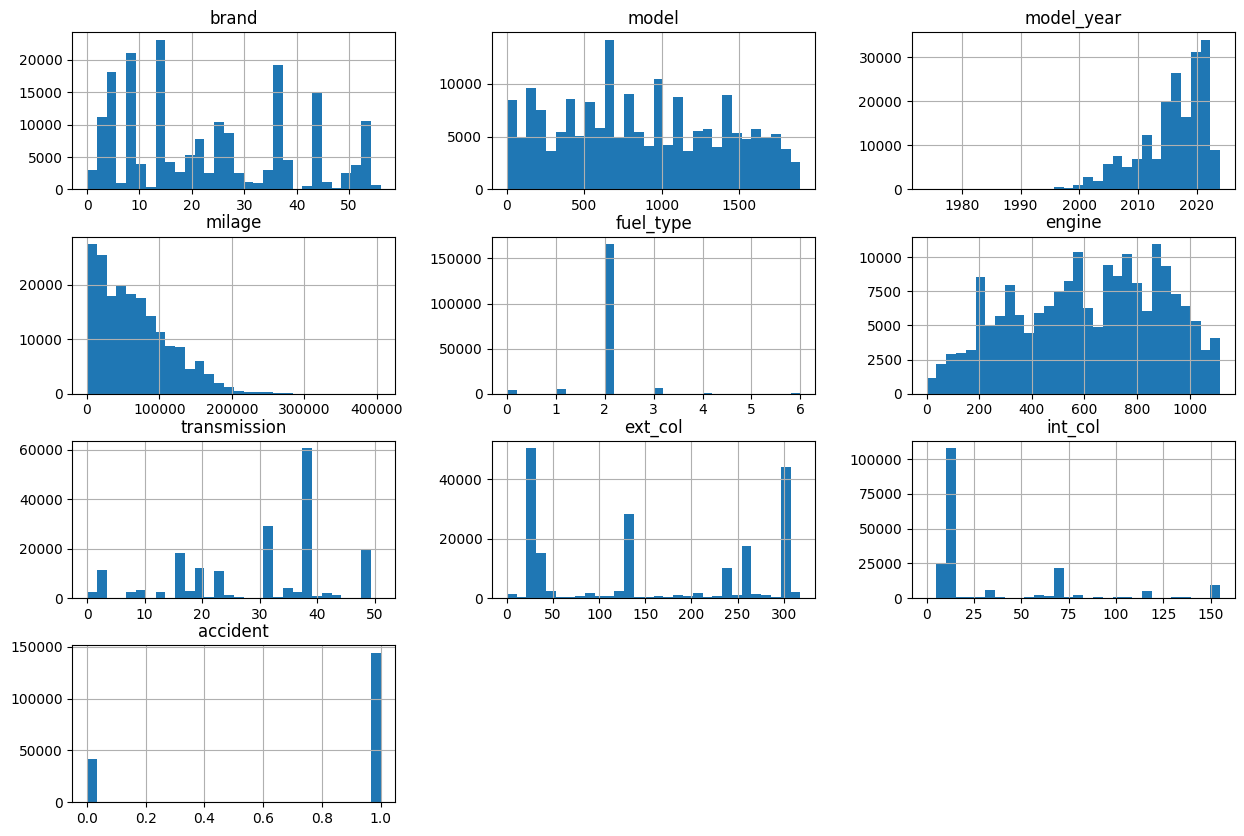

In [162]:
X.hist(bins=30, figsize=(15, 10))
plt.show()

In [164]:
print(X.corr())

                 brand     model  model_year    milage  fuel_type    engine  \
brand         1.000000 -0.040049   -0.014605 -0.007286   0.044207 -0.065512   
model        -0.040049  1.000000    0.001784  0.041706   0.009344 -0.042079   
model_year   -0.014605  0.001784    1.000000 -0.669936   0.010481  0.285300   
milage       -0.007286  0.041706   -0.669936  1.000000  -0.106037 -0.331196   
fuel_type     0.044207  0.009344    0.010481 -0.106037   1.000000  0.020790   
engine       -0.065512 -0.042079    0.285300 -0.331196   0.020790  1.000000   
transmission  0.036984 -0.027031    0.043596 -0.041158   0.097141 -0.017717   
ext_col       0.006038  0.007560   -0.032189  0.027763  -0.010935 -0.037814   
int_col      -0.004765  0.076990    0.024833 -0.030846   0.003968  0.006319   
accident      0.005722 -0.018062    0.256762 -0.321676   0.037391  0.163719   

              transmission   ext_col   int_col  accident  
brand             0.036984  0.006038 -0.004765  0.005722  
model       